# <center> Pandas (part 01) <center> 
    
<img src = 'https://github.com/saeed-saffari/alzahra-workshop-spr2021/blob/main/lecture/PIC/Pandas.png?raw=true' 
     width = "350"
     >
    
    
In the previous sessions, we dove into detail on NumPy and its ``ndarray`` object and matplotlib, which provides efficient storage and manipulation of dense typed arrays and Visualization in Python.
Here we'll build on this knowledge by looking in detail at the data structures provided by the Pandas library.
Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a ``DataFrame``.
``DataFrame``s are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data.
As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

As we saw, NumPy's ``ndarray`` data structure provides essential features for the type of clean, well-organized data typically seen in numerical computing tasks.
While it serves this purpose very well, its limitations become clear when we need more flexibility (e.g., attaching labels to data, working with missing data, etc.) and when attempting operations that do not map well to element-wise broadcasting (e.g., groupings, pivots, etc.), each of which is an important piece of analyzing the less structured data available in many forms in the world around us.
Pandas, and in particular its ``Series`` and ``DataFrame`` objects, builds on the NumPy array structure and provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.

To get started with pandas, you will need to get comfortable with its two workhorse data structures: Series and DataFrame. While they are not a universal solution for every problem, they provide a solid, easy-to-use basis for most applications.

In this session, we will focus on the mechanics of using ``Series``, ``DataFrame``, and related structures effectively.

    
##  Installation

- Conda install pandas
- pip install pandas
- pip install --upgrade pandas
    
## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array.

- ``Series`` as generalized NumPy array <br><br>
From what we've seen so far, it may look like the ``Series`` object is basically interchangeable with a one-dimensional NumPy array.
The essential difference is the presence of the index: while the Numpy Array has an *implicitly defined* integer index used to access the values, the Pandas ``Series`` has an *explicitly defined* index associated with the values.<br><br>
This explicit index definition gives the ``Series`` object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type.
For example, if we wish, we can use strings as an index.


- ``Series`` as specialized dictionary <br><br>
In this way, you can think of a Pandas ``Series`` a bit like a specialization of a Python dictionary.
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a ``Series`` is a structure which maps typed keys to a set of typed values.<br>
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas ``Series`` makes it much more efficient than Python dictionaries for certain operations.<br><br>
The ``Series``-as-dictionary analogy can be made even more clear by constructing a ``Series`` object directly from a Python dictionary:

In [2]:
indices = ['a', 'b', 'c']
my_list = [20,30,41]

dictionary_list = {'a':20, 'b':30, 'c':41}

In [3]:
pd.Series(data=my_list)

0    20
1    30
2    41
dtype: int64

In [5]:
x = pd.Series(data= my_list, index=indices)
print(x)

a    20
b    30
c    41
dtype: int64


In [7]:
x['b']

np.int64(30)

In [8]:
pd.Series(data=dictionary_list)

a    20
b    30
c    41
dtype: int64

### 1.1 Sum Series

In [9]:
ser1 = pd.Series([10,25,20,15],index=['IRN', 'USA','BRZ','Japan'])
ser2 = pd.Series([30,40,35,45],index=['IRN', 'USA','GER','Japan'])

In [10]:
ser1

IRN      10
USA      25
BRZ      20
Japan    15
dtype: int64

In [11]:
ser2

IRN      30
USA      40
GER      35
Japan    45
dtype: int64

In [12]:
ser1 + ser2

BRZ       NaN
GER       NaN
IRN      40.0
Japan    60.0
USA      65.0
dtype: float64

## 2. The Pandas DataFrame Object

The next fundamental structure in Pandas is the ``DataFrame``.
Like the ``Series`` object discussed in the previous section, the ``DataFrame`` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.
We'll now take a look at each of these perspectives.

If a Series is an analog of a one-dimensional array with flexible indices, a DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names. Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a DataFrame as a sequence of aligned Series objects. Here, by "aligned" we mean that they share the same index.

In [41]:
df = pd.DataFrame(data= np.random.randint(0,100,(5,4)),
                  index=['A','B','C','D','E'],
                 columns=['W','X','Y','Z'])
df

,W,X,Y,Z
A,72,40,53,35
B,81,89,51,13
C,78,21,88,18
D,61,8,93,72
E,70,9,15,1


### 2.1 Columns, index, shape
Like the ``Series`` object, the ``DataFrame`` has an ``index`` attribute that gives access to the index labels:

In [15]:
df.index

Index(['A', 'B', 'C', 'D', 'E'], dtype='str')

Additionally, the ``DataFrame`` has a ``columns`` attribute, which is an ``columns`` object holding the column labels:

In [16]:
df.columns

Index(['W', 'X', 'Y', 'Z'], dtype='str')

After all, the ``DataFrame`` has a ``shape`` attribute, which is tell us number of columns and index in out DataFrame:

In [17]:
df.shape

(5, 4)

Thus the ``DataFrame`` can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

### 2.2 Call in table

The individual ``Series`` that make up the columns of the ``DataFrame`` can be accessed via dictionary-style indexing of the column name:

In [19]:
df['W']

A    99
B    49
C    81
D     1
E    27
Name: W, dtype: int64

In [22]:
df[['W','Z']]

,W,Z
A,99,97
B,49,69
C,81,91
D,1,93
E,27,78


Equivalently, we can use attribute-style access with column names that are strings:

In [23]:
df.Z

A    97
B    69
C    91
D    93
E    78
Name: Z, dtype: int64

### 2.3 Create new column

You may add a new column to an existing pandas ``DataFrames`` just by assigning values to a new column name.

In [42]:
df['NEW'] = df['X'] + df['Y']
df

,W,X,Y,Z,NEW
A,72,40,53,35,93
B,81,89,51,13,140
C,78,21,88,18,109
D,61,8,93,72,101
E,70,9,15,1,24


In [43]:
df['Percentage'] = (df['X'] / df['NEW'] * 100).round(2)
df

,W,X,Y,Z,NEW,Percentage
A,72,40,53,35,93,43.01
B,81,89,51,13,140,63.57
C,78,21,88,18,109,19.27
D,61,8,93,72,101,7.92
E,70,9,15,1,24,37.50


### 2.4 Drop row and column

In [26]:
df

,W,X,Y,Z,NEW,Percentage
A,99,52,60,97,112,46.43
B,49,84,60,69,144,58.33
C,81,39,89,91,128,30.47
D,1,36,80,93,116,31.03
E,27,74,77,78,151,49.01


In [27]:
df.drop('B',axis=0)

,W,X,Y,Z,NEW,Percentage
A,99,52,60,97,112,46.43
C,81,39,89,91,128,30.47
D,1,36,80,93,116,31.03
E,27,74,77,78,151,49.01


In [28]:
df.drop('NEW',axis=1)

,W,X,Y,Z,Percentage
A,99,52,60,97,46.43
B,49,84,60,69,58.33
C,81,39,89,91,30.47
D,1,36,80,93,31.03
E,27,74,77,78,49.01


In [29]:
df

,W,X,Y,Z,NEW,Percentage
A,99,52,60,97,112,46.43
B,49,84,60,69,144,58.33
C,81,39,89,91,128,30.47
D,1,36,80,93,116,31.03
E,27,74,77,78,151,49.01


In [30]:
df.drop('B',axis=0,inplace=True)
df

,W,X,Y,Z,NEW,Percentage
A,99,52,60,97,112,46.43
C,81,39,89,91,128,30.47
D,1,36,80,93,116,31.03
E,27,74,77,78,151,49.01


In [31]:
df

,W,X,Y,Z,NEW,Percentage
A,99,52,60,97,112,46.43
C,81,39,89,91,128,30.47
D,1,36,80,93,116,31.03
E,27,74,77,78,151,49.01


In [32]:
df = df.drop('NEW',axis=1)
df

,W,X,Y,Z,Percentage
A,99,52,60,97,46.43
C,81,39,89,91,30.47
D,1,36,80,93,31.03
E,27,74,77,78,49.01


In [33]:
df

,W,X,Y,Z,Percentage
A,99,52,60,97,46.43
C,81,39,89,91,30.47
D,1,36,80,93,31.03
E,27,74,77,78,49.01


In [34]:
df1 = df.drop('Z',axis=1)
df1

,W,X,Y,Percentage
A,99,52,60,46.43
C,81,39,89,30.47
D,1,36,80,31.03
E,27,74,77,49.01


In [35]:
df

,W,X,Y,Z,Percentage
A,99,52,60,97,46.43
C,81,39,89,91,30.47
D,1,36,80,93,31.03
E,27,74,77,78,49.01


### 2.5 Rename

In [44]:
df.rename(columns={'W': 'Sarah'})

,Sarah,X,Y,Z,NEW,Percentage
A,72,40,53,35,93,43.01
B,81,89,51,13,140,63.57
C,78,21,88,18,109,19.27
D,61,8,93,72,101,7.92
E,70,9,15,1,24,37.50


In [45]:
df.rename(columns={'W': 'Sarah', 'Z': 'Sanaz'}, inplace=True)
df

,Sarah,X,Y,Sanaz,NEW,Percentage
A,72,40,53,35,93,43.01
B,81,89,51,13,140,63.57
C,78,21,88,18,109,19.27
D,61,8,93,72,101,7.92
E,70,9,15,1,24,37.50


In [46]:
df = df.rename(index={'A': 'David', 'D':'Saeed'})
df

,Sarah,X,Y,Sanaz,NEW,Percentage
David,72,40,53,35,93,43.01
B,81,89,51,13,140,63.57
C,78,21,88,18,109,19.27
Saeed,61,8,93,72,101,7.92
E,70,9,15,1,24,37.50


In [48]:
df

,Sarah,X,Y,Sanaz,NEW,Percentage
David,72,40,53,35,93,43.01
B,81,89,51,13,140,63.57
C,78,21,88,18,109,19.27
Saeed,61,8,93,72,101,7.92
E,70,9,15,1,24,37.50


### 2.6 Sort Value and index

Sorting a dataset by some criterion is another important built-in operation. To sort lexicographically by row or column index, use the ``sort_index`` method, which returns a new, sorted object:

In [49]:
df.sort_index()

,Sarah,X,Y,Sanaz,NEW,Percentage
B,81,89,51,13,140,63.57
C,78,21,88,18,109,19.27
David,72,40,53,35,93,43.01
E,70,9,15,1,24,37.50
Saeed,61,8,93,72,101,7.92


In [50]:
df.sort_index(axis = 1)

,NEW,Percentage,Sanaz,Sarah,X,Y
David,93,43.01,35,72,40,53
B,140,63.57,13,81,89,51
C,109,19.27,18,78,21,88
Saeed,101,7.92,72,61,8,93
E,24,37.50,1,70,9,15


The data is sorted in ascending order by default, but can be sorted in descending order, too:

In [51]:
df.sort_index(ascending=False)

,Sarah,X,Y,Sanaz,NEW,Percentage
Saeed,61,8,93,72,101,7.92
E,70,9,15,1,24,37.50
David,72,40,53,35,93,43.01
C,78,21,88,18,109,19.27
B,81,89,51,13,140,63.57


To sort a Series by its values, use its ``sort_values`` method:

In [52]:
df_sort = df.sort_values(by= 'Sanaz', ascending=False)
df_sort

,Sarah,X,Y,Sanaz,NEW,Percentage
Saeed,61,8,93,72,101,7.92
David,72,40,53,35,93,43.01
C,78,21,88,18,109,19.27
B,81,89,51,13,140,63.57
E,70,9,15,1,24,37.50


### 2.7 call in table

For ``DataFrame`` label-indexing on the rows, I introduce the special indexing operators ``loc`` and ``iloc``. They enable you to select a subset of the rows and columns from a DataFrame with NumPy-like notation using either axis labels (``loc``) or integers (``iloc``).

In [53]:
df

,Sarah,X,Y,Sanaz,NEW,Percentage
David,72,40,53,35,93,43.01
B,81,89,51,13,140,63.57
C,78,21,88,18,109,19.27
Saeed,61,8,93,72,101,7.92
E,70,9,15,1,24,37.50


#### iloc

In [56]:
df.iloc[0:3]

,Sarah,X,Y,Sanaz,NEW,Percentage
David,72,40,53,35,93,43.01
B,81,89,51,13,140,63.57
C,78,21,88,18,109,19.27


In [58]:
df.iloc[0:3, 2:-1]

,Y,Sanaz,NEW
David,53,35,93
B,51,13,140
C,88,18,109


In [61]:
df.iloc[0:3, [0,3]]

,Sarah,Sanaz
David,72,35
B,81,13
C,78,18


In [62]:
df.iloc[:,2:4]

,Y,Sanaz
David,53,35
B,51,13
C,88,18
Saeed,93,72
E,15,1


#### loc

Similarly, using the ``loc`` indexer we can index the underlying data in an array-like style but using the explicit index and column names:

In [63]:
df.loc['David']

Sarah         72.00
X             40.00
Y             53.00
Sanaz         35.00
NEW           93.00
Percentage    43.01
Name: David, dtype: float64

In [64]:
df.loc[['David', 'C']]

,Sarah,X,Y,Sanaz,NEW,Percentage
David,72,40,53,35,93,43.01
C,78,21,88,18,109,19.27


In [65]:
df.loc['David','X']

np.int64(40)

In [66]:
df.loc[['Saeed', 'C'],['Sanaz','X']]

,Sanaz,X
Saeed,72,8
C,18,21


In [67]:
df.loc[:,['Sanaz','X']]

,Sanaz,X
David,35,40
B,13,89
C,18,21
Saeed,72,8
E,1,9


In [68]:
df_2 = df.loc[:,['Sanaz','X']]

In [69]:
df_2

,Sanaz,X
David,35,40
B,13,89
C,18,21
Saeed,72,8
E,1,9


With this picture in mind, many familiar array-like observations can be done on the ``DataFrame`` itself.
For example, we can transpose the full ``DataFrame`` to swap rows and columns:

In [70]:
df.T

,David,B,C,Saeed,E
Sarah,72.00,81.00,78.00,61.00,70.0
X,40.00,89.00,21.00,8.00,9.0
Y,53.00,51.00,88.00,93.00,15.0
Sanaz,35.00,13.00,18.00,72.00,1.0
NEW,93.00,140.00,109.00,101.00,24.0
Percentage,43.01,63.57,19.27,7.92,37.5


In [71]:
df

,Sarah,X,Y,Sanaz,NEW,Percentage
David,72,40,53,35,93,43.01
B,81,89,51,13,140,63.57
C,78,21,88,18,109,19.27
Saeed,61,8,93,72,101,7.92
E,70,9,15,1,24,37.50


### 2.8 Filter

Similarly, direct masking operations are also interpreted row-wise rather than column-wise:

In [72]:
df

,Sarah,X,Y,Sanaz,NEW,Percentage
David,72,40,53,35,93,43.01
B,81,89,51,13,140,63.57
C,78,21,88,18,109,19.27
Saeed,61,8,93,72,101,7.92
E,70,9,15,1,24,37.50


In [73]:
df > 50

,Sarah,X,Y,Sanaz,NEW,Percentage
David,True,False,True,False,True,False
B,True,True,True,False,True,True
C,True,False,True,False,True,False
Saeed,True,False,True,True,True,False
E,True,False,False,False,False,False


In [74]:
df[df > 50]

,Sarah,X,Y,Sanaz,NEW,Percentage
David,72,NaN,53.0,NaN,93.0,NaN
B,81,89.0,51.0,NaN,140.0,63.57
C,78,NaN,88.0,NaN,109.0,NaN
Saeed,61,NaN,93.0,72.0,101.0,NaN
E,70,NaN,NaN,NaN,NaN,NaN


In [77]:
df[df['Sanaz'] > df['Sarah']]

,Sarah,X,Y,Sanaz,NEW,Percentage
Saeed,61,8,93,72,101,7.92


In [78]:
df['Y'] < 60

David     True
B         True
C        False
Saeed    False
E         True
Name: Y, dtype: bool

In [79]:
df['Sarah']> 43

David    True
B        True
C        True
Saeed    True
E        True
Name: Sarah, dtype: bool

In [80]:
(df['Sarah']> 43) & (df['Y'] < 60)

David     True
B         True
C        False
Saeed    False
E         True
dtype: bool

In [84]:
df[(df['Sarah']> 43) & (df['Y'] < 60)]

,Sarah,X,Y,Sanaz,NEW,Percentage
David,72,40,53,35,93,43.01
B,81,89,51,13,140,63.57
E,70,9,15,1,24,37.50


In [85]:
df

,Sarah,X,Y,Sanaz,NEW,Percentage
David,72,40,53,35,93,43.01
B,81,89,51,13,140,63.57
C,78,21,88,18,109,19.27
Saeed,61,8,93,72,101,7.92
E,70,9,15,1,24,37.50


## 3. Reading data

pandas features a number of functions for reading tabular data as a DataFrame object. 

|Function | Description|
|---| --- |
|read_csv|Load delimited data from a file, URL, or file-like object; use comma as default delimiter|
|read_table|Load delimited data from a file, URL, or file-like object; use tab ('\t') as default delimiter|
|read_fwf|Read data in fixed-width column format (i.e., no delimiters)|
|read_clipboard|Version of read_table that reads data from the clipboard; useful for converting tables from web pages|
|read_excel|Read tabular data from an Excel XLS or XLSX file|
|read_hdf|Read HDF5 files written by pandas|
|read_html|Read all tables found in the given HTML document|
|read_json|Read data from a JSON (JavaScript Object Notation) string representation|
|read_msgpack|Read pandas data encoded using the MessagePack binary format|
|read_pickle|Read an arbitrary object stored in Python pickle format|
read_sas| Read a SAS dataset stored in one of the SAS system’s custom storage formats | 
read_sql|Read the results of a SQL query (using SQLAlchemy) as a pandas DataFrame|
read_stata|Read a dataset from Stata file format|
read_feather|Read the Feather binary file format|






### 3.1 Human development index (HDI)
<b> Source:  [UNITED NATIONS DEVELOPMENT PROGRAMME (Human Development Reports)](http://hdr.undp.org/en/indicators/137506#)

### 3.2 Real GDP Growth (Annual percent change) (IMF)
<b> Source:  [International Monetary Fund (IMF)](https://www.imf.org/external/datamapper/NGDP_RPCH@WEO)

In [86]:
growth = pd.read_excel('Real GDP Growth (IMF).xlsx',
                       sheet_name= 'growth_1')
growth.head()

,year,Australia,Canada,"China, People's Republic of",Iran,Norway,Russian Federation,United States
0,1980,2.9,2.2,7.9,-18.8,4.5,NaN,-0.3
1,1981,4.1,3.5,5.1,-8.6,1.6,NaN,2.5
2,1982,0.1,-3.2,9.0,13.1,0.2,NaN,-1.8
3,1983,-0.5,2.6,10.8,13.8,4.0,NaN,4.6
4,1984,6.3,5.9,15.2,-9.9,6.1,NaN,7.2


In [87]:
growth.shape

(47, 8)

In [88]:
growth.columns

Index(['year', 'Australia', 'Canada', 'China, People's Republic of', 'Iran',
       'Norway', 'Russian Federation', 'United States'],
      dtype='str')

In [89]:
growth.index

RangeIndex(start=0, stop=47, step=1)

In [90]:
growth.set_index('year', inplace=True)

In [91]:
growth.head()

,Australia,Canada,"China, People's Republic of",Iran,Norway,Russian Federation,United States
year,,,,,,,
1980,2.9,2.2,7.9,-18.8,4.5,NaN,-0.3
1981,4.1,3.5,5.1,-8.6,1.6,NaN,2.5
1982,0.1,-3.2,9.0,13.1,0.2,NaN,-1.8
1983,-0.5,2.6,10.8,13.8,4.0,NaN,4.6
1984,6.3,5.9,15.2,-9.9,6.1,NaN,7.2


In [92]:
growth = growth.rename(columns={"China, People's Republic of":'China', 'Russian Federation':'Russian'})
growth.head()

,Australia,Canada,China,Iran,Norway,Russian,United States
year,,,,,,,
1980,2.9,2.2,7.9,-18.8,4.5,NaN,-0.3
1981,4.1,3.5,5.1,-8.6,1.6,NaN,2.5
1982,0.1,-3.2,9.0,13.1,0.2,NaN,-1.8
1983,-0.5,2.6,10.8,13.8,4.0,NaN,4.6
1984,6.3,5.9,15.2,-9.9,6.1,NaN,7.2


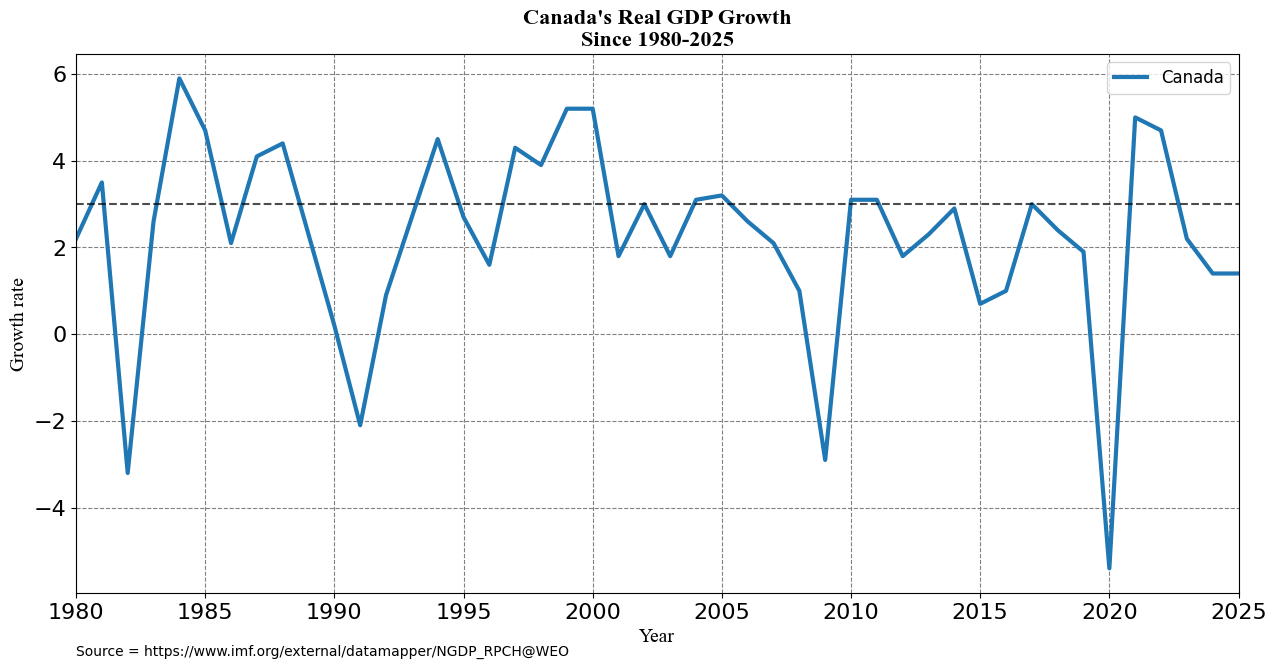

In [93]:
growth.plot(y = 'Canada',
           kind='line',
           figsize = (15,7), fontsize = 16, linewidth = 3)

plt.grid(ls = '--', c = 'gray')
plt.xlabel('Year', fontsize = 14, fontname = 'Times New Roman')
plt.ylabel('Growth rate',fontsize = 14, fontname = 'Times New Roman')
plt.title("Canada's Real GDP Growth\nSince 1980-2025",fontsize = 16, fontname = 'Times New Roman', fontweight = 'bold')
plt.figtext(0.125,0.02, 'Source = https://www.imf.org/external/datamapper/NGDP_RPCH@WEO')

plt.legend(loc= 'best', fontsize = 'large')
plt.xlim(1980,2025)
plt.axhline(3, c = 'k', ls = '--', alpha = 0.7)
#plt.savefig('Iran GDP growth 1 iMF.jpg', dpi = 700)
plt.show()

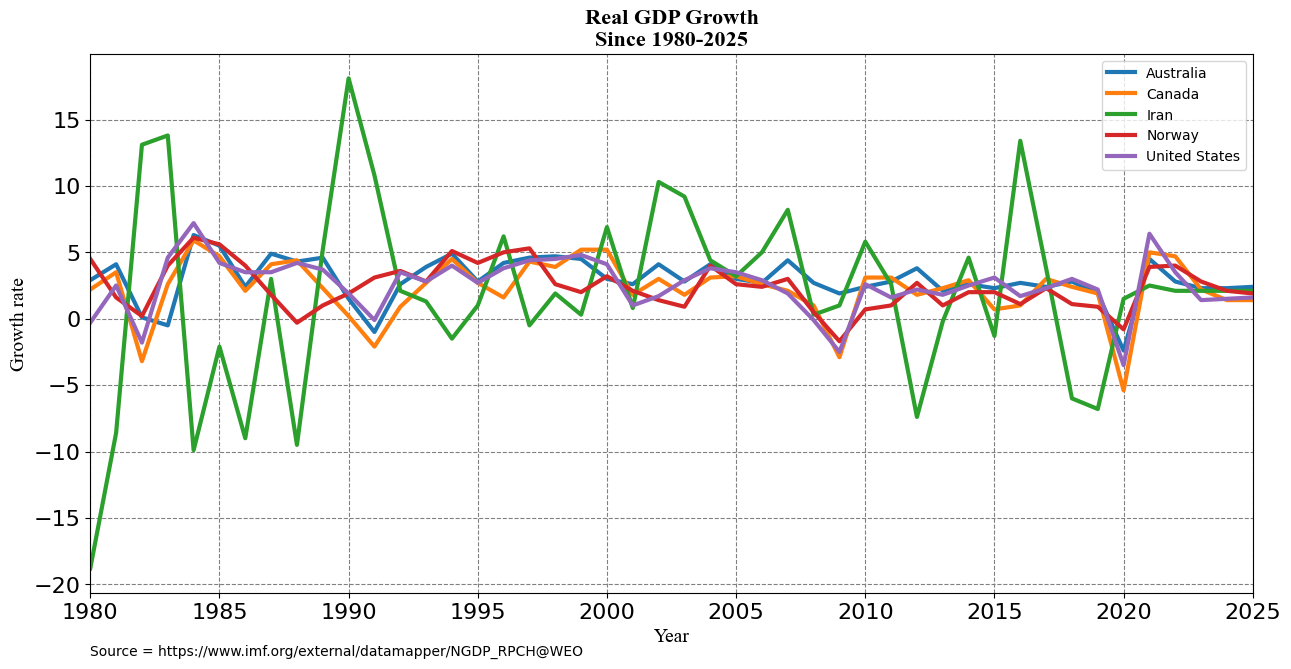

In [94]:
growth.plot(y =['Australia', 'Canada', 'Iran','Norway','United States',
               #'China',
               # 'Russian'
               ],
           kind='line',
           figsize = (15,7), fontsize = 16, linewidth = 3)

plt.grid(ls = '--', c = 'gray')
plt.xlabel('Year', fontsize = 14, fontname = 'Times New Roman')
plt.ylabel('Growth rate',fontsize = 14, fontname = 'Times New Roman')
plt.title("Real GDP Growth\nSince 1980-2025",fontsize = 16, fontname = 'Times New Roman', fontweight = 'bold')
plt.figtext(0.125,0.02, 'Source = https://www.imf.org/external/datamapper/NGDP_RPCH@WEO')

plt.legend(loc= 'best', fontsize = 10)
plt.xlim(1980,2025)
#plt.axhline(3, c = 'k', ls = '--', alpha = 0.7)
#plt.savefig('Iran GDP growth 1 iMF.jpg', dpi = 700)
plt.show()

In [95]:
growth.head()

,Australia,Canada,China,Iran,Norway,Russian,United States
year,,,,,,,
1980,2.9,2.2,7.9,-18.8,4.5,NaN,-0.3
1981,4.1,3.5,5.1,-8.6,1.6,NaN,2.5
1982,0.1,-3.2,9.0,13.1,0.2,NaN,-1.8
1983,-0.5,2.6,10.8,13.8,4.0,NaN,4.6
1984,6.3,5.9,15.2,-9.9,6.1,NaN,7.2


In [96]:
growth[growth.Canada < 0]

,Australia,Canada,China,Iran,Norway,Russian,United States
year,,,,,,,
1982,0.1,-3.2,9.0,13.1,0.2,NaN,-1.8
1991,-1.0,-2.1,8.4,10.8,3.1,-5.0,-0.1
2009,1.9,-2.9,9.3,1.0,-1.7,-7.8,-2.5
2020,-2.4,-5.4,2.3,1.5,-0.8,-3.1,-3.5


In [97]:
growth['Canada'][growth.Canada < 0]

year
1982   -3.2
1991   -2.1
2009   -2.9
2020   -5.4
Name: Canada, dtype: float64

In [98]:
growth.columns

Index(['Australia', 'Canada', 'China', 'Iran', 'Norway', 'Russian',
       'United States'],
      dtype='str')

In [99]:
growth.describe()

,Australia,Canada,China,Iran,Norway,Russian,United States
count,47.000000,47.000000,47.000000,47.000000,47.000000,36.000000,47.000000
mean,2.953191,2.263830,8.808511,1.897872,2.402128,1.155556,2.517021
std,1.630931,2.214618,3.003753,6.935432,1.700702,5.816796,2.013684
min,-2.400000,-5.400000,2.300000,-18.800000,-1.700000,-14.500000,-3.500000
25%,2.400000,1.550000,6.900000,-0.350000,1.100000,-2.275000,1.650000
50%,2.800000,2.400000,8.500000,2.100000,2.100000,1.900000,2.700000
75%,4.150000,3.350000,10.800000,5.100000,3.750000,5.100000,3.750000
max,6.300000,5.900000,15.200000,18.100000,6.100000,10.000000,7.200000


In [100]:
growth.max()

Australia         6.3
Canada            5.9
China            15.2
Iran             18.1
Norway            6.1
Russian          10.0
United States     7.2
dtype: float64

In [101]:
growth.min()

Australia        -2.4
Canada           -5.4
China             2.3
Iran            -18.8
Norway           -1.7
Russian         -14.5
United States    -3.5
dtype: float64

In [102]:
growth.mean()

Australia        2.953191
Canada           2.263830
China            8.808511
Iran             1.897872
Norway           2.402128
Russian          1.155556
United States    2.517021
dtype: float64

In [103]:
growth.Canada.mean()

np.float64(2.2638297872340427)

In [104]:
growth['Canada'].mean()

np.float64(2.2638297872340427)

In [105]:
growth_2020 = pd.read_excel('Real GDP Growth (IMF).xlsx', sheet_name=1)
growth_2020.head()

,Country,2020
0,Afghanistan,-5.0
1,Albania,-3.5
2,Algeria,-6.0
3,Angola,-4.0
4,Antigua and Barbuda,-17.3


In [106]:
growth_2020.shape

(194, 2)

In [107]:
growth_2020.columns

Index(['Country', 2020], dtype='object')

In [108]:
growth_2020.index

RangeIndex(start=0, stop=194, step=1)

In [109]:
largest = growth_2020.nlargest(15, 2020)
largest

,Country,2020
70,Guyana,43.4
56,Ethiopia,6.1
68,Guinea,5.2
169,Tajikistan,4.5
13,Bangladesh,3.8
50,Egypt,3.6
118,Myanmar,3.2
168,Taiwan Province of China,3.1
189,Vietnam,2.9
80,Ireland,2.5


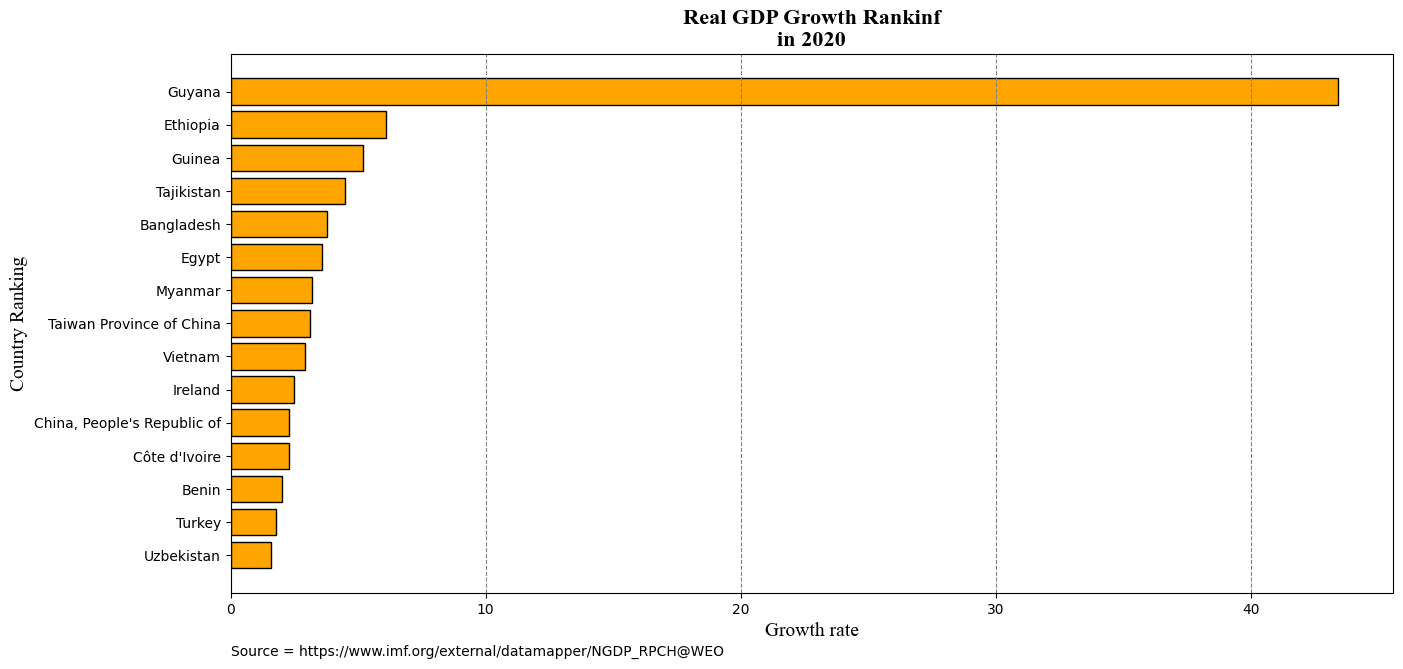

In [110]:
plt.figure(figsize= (15,7))
plt.barh(largest.Country, largest[2020],
       color = 'orange',
       edgecolor = 'black')

plt.gca().invert_yaxis()

plt.grid(ls = '--', c = 'gray', axis='x')
plt.ylabel('Country Ranking', fontsize = 14, fontname = 'Times New Roman')
plt.xlabel('Growth rate',fontsize = 14, fontname = 'Times New Roman')
plt.title("Real GDP Growth Rankinf\nin 2020",fontsize = 16, fontname = 'Times New Roman', fontweight = 'bold')
plt.figtext(0.125,0.02, 'Source = https://www.imf.org/external/datamapper/NGDP_RPCH@WEO')


plt.show()

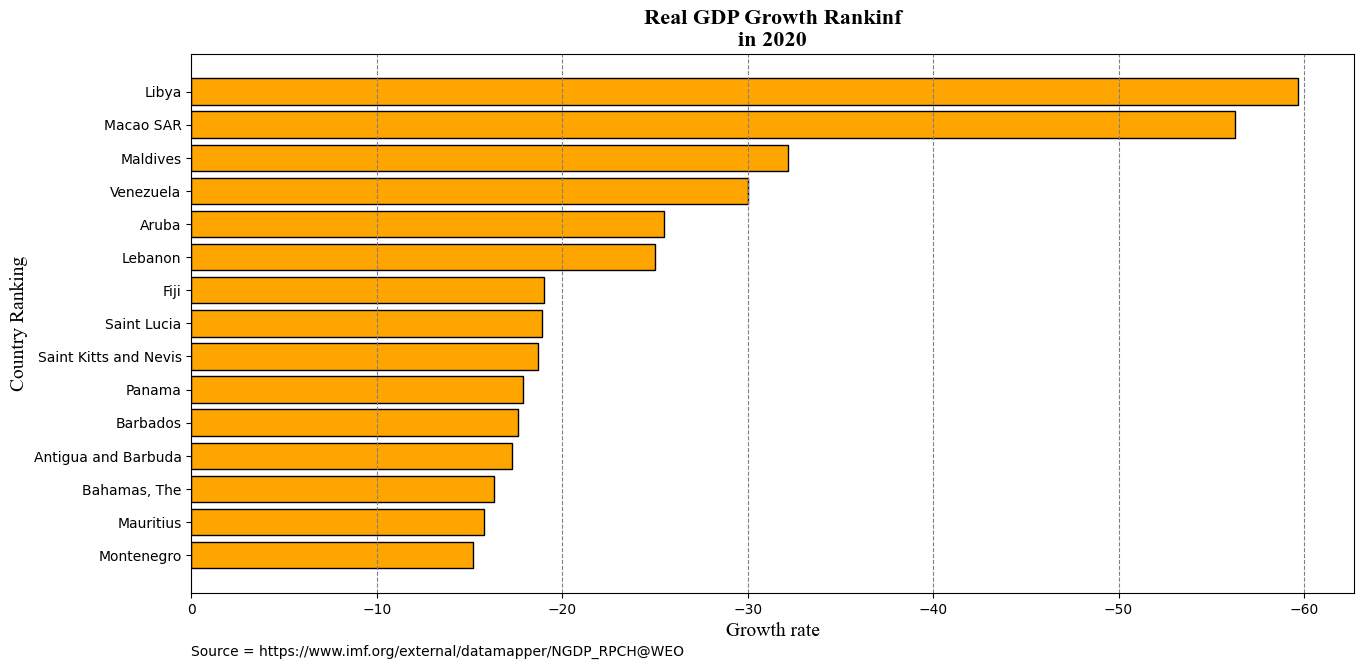

In [111]:
smallest = growth_2020.nsmallest(15, 2020)
smallest

plt.figure(figsize= (15,7))
plt.barh(smallest.Country, smallest[2020],
       color = 'orange',
       edgecolor = 'black')

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.grid(ls = '--', c = 'gray', axis='x')
plt.ylabel('Country Ranking', fontsize = 14, fontname = 'Times New Roman')
plt.xlabel('Growth rate',fontsize = 14, fontname = 'Times New Roman')
plt.title("Real GDP Growth Rankinf\nin 2020",fontsize = 16, fontname = 'Times New Roman', fontweight = 'bold')
plt.figtext(0.125,0.02, 'Source = https://www.imf.org/external/datamapper/NGDP_RPCH@WEO')


plt.show()

### 3.3 GDP per capita, current prices (Purchasing power parity; international dollars per capita) (IMF)
<b> Source:  [International Monetary Fund (IMF)](https://www.imf.org/external/datamapper/PPPPC@WEO/OEMDC/ADVEC/WEOWORLD)

In [112]:
import os

os.getcwd()

'/Users/saeed/Documents/GitHub/R_Python_workshop_ARDC_Win_2026/Python Sessions'

In [113]:
#os.chdir('/Users/saeed/Documents/GitHub/')
#os.chdir('/Users/saeed/Documents/GitHub/R_Python_workshop_ARDC_Win_2026/Python Sessions')

os.getcwd()

'/Users/saeed/Documents/GitHub/R_Python_workshop_ARDC_Win_2026/Python Sessions'

In [114]:
os.listdir()

['text_1.png',
 'survey_results_public.csv',
 'GDP per capita ppp 2021.xlsx',
 'Real GDP Growth (IMF).xlsx',
 '3- Intro Python - Session 3.ipynb',
 'README.md',
 'Human development index (HDI).xlsx',
 '3- Intro Python - Session 3 - teach.ipynb',
 '.ipynb_checkpoints',
 '1- Intro Python - Session 1.ipynb',
 '2- Intro Python - Session 2.ipynb']

# <center> Pandas (part 02) <center> 

## Imports

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data Cleaning and Preparation
### 1.1 Handling Missing Data (Na, NAN)

Missing data occurs commonly in many data analysis applications. One of the goals of pandas is to make working with missing data as painless as possible. For example, all of the descriptive statistics on pandas objects exclude missing data by default.

The way that missing data is represented in pandas objects is somewhat imperfect, but it is functional for a lot of users. For numeric data, pandas uses the floating-point value ``NaN`` (`Not a Number`) to represent missing data.

In pandas, we’ve adopted a convention used in the R programming language by referring to missing data as `NA`, which stands for `not available`. In statistics applications, `NA` data may either be data that does not exist or that exists but was not observed (through problems with data collection, for example). When cleaning up data for analysis, it is often important to do analysis on the missing data itself to identify data collection problems or potential biases in the data caused by missing data.

- **NA handling methods**

|Argument | Description |
| ---     | ---         |
|dropna   |Filteaxis labels based on whether values for each label have missing data, with varying thresholds for how much missing data to tolerate. |
|fillna   | Fill in missing data with some value or using an interpolation method such as'ffill'or'bfill'. |
|isnull   | Return boolean values indicating which values are missing/NA. |
|notnull  | Negation ofisnull.|
  

In [116]:
df = pd.DataFrame({
    'col1':[1,2,3,4,np.nan],
    'col2':[np.nan,555,np.nan,444, 333],
    'col3':['abc', 'def', 'ghi', 'xyz', 'ghj'],
    'col4':['16', '23', '16', '25', '27'],
    'col5':['187', '160', np.nan, '202', '163']
})
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


In [117]:
df.isnull()

,col1,col2,col3,col4,col5
0,False,True,False,False,False
1,False,False,False,False,False
2,False,True,False,False,True
3,False,False,False,False,False
4,True,False,False,False,False


In [118]:
df.isna()

,col1,col2,col3,col4,col5
0,False,True,False,False,False
1,False,False,False,False,False
2,False,True,False,False,True
3,False,False,False,False,False
4,True,False,False,False,False


The `dropna` can be helpful that returns the Series or DataFrame with only the `non-null` data and index values.   
Also you may want to drop rows or columns that are all `NA` or only those containing any `NA`s. `dropna` by default drops any row containing a missing value.

In [119]:
df.dropna()

,col1,col2,col3,col4,col5
1,2.0,555.0,def,23,160
3,4.0,444.0,xyz,25,202


Passing `how='all'` will only drop rows that are all `NA`:

In [120]:
df.loc[6] = np.nan

In [121]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163
6,NaN,NaN,NaN,NaN,NaN


In [122]:
df.dropna(axis = 0, how = 'all', inplace=True)
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


To drop columns in the same way, pass `axis=1`:

In [123]:
df['col6'] = np.nan

In [124]:
df

,col1,col2,col3,col4,col5,col6
0,1.0,NaN,abc,16,187,NaN
1,2.0,555.0,def,23,160,NaN
2,3.0,NaN,ghi,16,NaN,NaN
3,4.0,444.0,xyz,25,202,NaN
4,NaN,333.0,ghj,27,163,NaN


In [125]:
df.dropna(axis=1, how='all', inplace=True)
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


In [126]:
df.dropna(axis=1)

,col3,col4
0,abc,16
1,def,23
2,ghi,16
3,xyz,25
4,ghj,27


### 1.2 Filling In Missing Data

Rather than filtering out missing data (and potentially discarding other data along with it), you may want to fill in the “holes” in any number of ways. For most purposes, the `fillna` method is the workhorse function to use. Calling `fillna` with a constant replaces missing values with that value:

In [127]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


In [128]:
df.fillna(120)

,col1,col2,col3,col4,col5
0,1.0,120.0,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,120.0,ghi,16,120
3,4.0,444.0,xyz,25,202
4,120.0,333.0,ghj,27,163


In [129]:
df.fillna('missing')

,col1,col2,col3,col4,col5
0,1.0,missing,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,missing,ghi,16,missing
3,4.0,444.0,xyz,25,202
4,missing,333.0,ghj,27,163


Calling `fillna` with a dict, you can use a different fill value for each column:

In [130]:
df.fillna({'col1': 123, 'col2': 'missing'})

,col1,col2,col3,col4,col5
0,1.0,missing,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,missing,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,123.0,333.0,ghj,27,163


In [131]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


In [132]:
df.ffill()

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,555.0,ghi,16,160
3,4.0,444.0,xyz,25,202
4,4.0,333.0,ghj,27,163


In [135]:
df.ffill().dropna()

,col1,col2,col3,col4,col5
1,2.0,555.0,def,23,160
2,3.0,555.0,ghi,16,160
3,4.0,444.0,xyz,25,202
4,4.0,333.0,ghj,27,163


In [136]:
df.bfill()

,col1,col2,col3,col4,col5
0,1.0,555.0,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,444.0,ghi,16,202
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


In [137]:
df.fillna(df.mean(numeric_only=True))

,col1,col2,col3,col4,col5
0,1.0,444.0,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,444.0,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,2.5,333.0,ghj,27,163


In [140]:
#df.drop(columns='col3').interpolate()

In [141]:
df[['col4','col5']] = df[['col4','col5']].astype(float)

In [142]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,16.0,NaN
3,4.0,444.0,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0


In [143]:
df.fillna(df.mean(numeric_only=True))

,col1,col2,col3,col4,col5
0,1.0,444.0,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,444.0,ghi,16.0,178.0
3,4.0,444.0,xyz,25.0,202.0
4,2.5,333.0,ghj,27.0,163.0


In [144]:
df.drop(columns='col3').interpolate()

,col1,col2,col4,col5
0,1.0,NaN,16.0,187.0
1,2.0,555.0,23.0,160.0
2,3.0,499.5,16.0,181.0
3,4.0,444.0,25.0,202.0
4,4.0,333.0,27.0,163.0


### 1.3 Replacing Values

Filling in missing data with the `fillna` method is a special case of more general value replacement. Now `replace` method provides a simpler and more flexible and general way to do so.

In [145]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,16.0,NaN
3,4.0,444.0,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0


In [146]:
df.replace(333, 567)

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,16.0,NaN
3,4.0,444.0,xyz,25.0,202.0
4,NaN,567.0,ghj,27.0,163.0


In [147]:
df.replace(np.nan, 'missing')

,col1,col2,col3,col4,col5
0,1.0,missing,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,missing,ghi,16.0,missing
3,4.0,444.0,xyz,25.0,202.0
4,missing,333.0,ghj,27.0,163.0


In [148]:
df.replace(np.nan, df.mean(numeric_only=True))

,col1,col2,col3,col4,col5
0,1.0,444.0,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,444.0,ghi,16.0,178.0
3,4.0,444.0,xyz,25.0,202.0
4,2.5,333.0,ghj,27.0,163.0


In [149]:
df.replace([16,444], [12,'all'])

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,12.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,12.0,NaN
3,4.0,all,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0


## 2. Combining Datasets


### Concat

Some of the most interesting studies of data come from combining different data sources.  
These operations can involve anything from very straightforward concatenation of two different datasets, to more complicated database-style joins and merges that correctly handle any overlaps between the datasets.
``Series`` and ``DataFrame``s are built with this type of operation in mind, and Pandas includes functions and methods that make this sort of data wrangling fast and straightforward.

Here we'll take a look at simple concatenation of ``Series`` and ``DataFrame``s with the ``pd.concat`` function; later we'll dive into more sophisticated in-memory merges and joins implemented in Pandas.

In [150]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [151]:
df1 = make_df('ABCD',range(4))
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [152]:
df2 = make_df('ABCD', range(4,8))
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [153]:
pd.concat([df1, df2], axis = 0)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [154]:
pd.concat([df1, df2], axis = 1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7


In [155]:
df3 = make_df('EFGH', range(0,4))
df3

,E,F,G,H
0,E0,F0,G0,H0
1,E1,F1,G1,H1
2,E2,F2,G2,H2
3,E3,F3,G3,H3


In [156]:
pd.concat([df1,df3], axis=1)

,A,B,C,D,E,F,G,H
0,A0,B0,C0,D0,E0,F0,G0,H0
1,A1,B1,C1,D1,E1,F1,G1,H1
2,A2,B2,C2,D2,E2,F2,G2,H2
3,A3,B3,C3,D3,E3,F3,G3,H3


### Merge
One essential feature offered by Pandas is its high-performance, in-memory join and merge operations.
If you have ever worked with databases, you should be familiar with this type of data interaction.
The main interface for this is the ``pd.merge`` function, and we'll see few examples of how this can work in practice.

In [157]:
left = pd.DataFrame({
    'key': ['k0', 'k1', 'k2', 'k3'],
    'A'  : ['A0', 'A1', 'A2', 'A3'],
    'B'  : ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({
    'key': ['k0', 'k1', 'k2', 'k4'],
    'C'  : ['C0', 'C1', 'C2', 'C4'],
    'D'  : ['D0', 'D1', 'D2', 'D4']})

In [158]:
left

,key,A,B
0,k0,A0,B0
1,k1,A1,B1
2,k2,A2,B2
3,k3,A3,B3


In [159]:
right

,key,C,D
0,k0,C0,D0
1,k1,C1,D1
2,k2,C2,D2
3,k4,C4,D4


Most simply, you can explicitly specify the name of the key column using the on keyword, which takes a column name or a list of column names:

In [160]:
pd.merge(left, right, how='inner', on = 'key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2


In [161]:
pd.merge(left, right, how='outer', on = 'key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,NaN,NaN
4,k4,NaN,NaN,C4,D4


In [162]:
pd.merge(left, right, how='left', on = 'key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,NaN,NaN


In [163]:
pd.merge(left, right, how='right', on = 'key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k4,NaN,NaN,C4,D4


## 3. Group by

`DataFrame.groupby()` function is used to collect the identical data into groups and perform aggregate functions on the grouped data. Group by operation involves splitting the data, applying some functions, and finally aggregating the results.

In [164]:
data = {
    'Company': ['GOOG', 'GOOG','GOOG', 'MSFT', 'MSFT', 'FB', 'FB'],
    'Person' : ['Sam', 'Charlie', 'John', 'Amy', 'Vanessa', 'Carl', 'Sarah'],
    'Sales'  : [200, 120, 236, 340, 124, 243, 350]
}

In [165]:
df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,GOOG,John,236
3,MSFT,Amy,340
4,MSFT,Vanessa,124
5,FB,Carl,243
6,FB,Sarah,350


In [166]:
by_comp = df.groupby('Company')
by_comp

In [167]:
by_comp.mean(numeric_only=True)

,Sales
Company,
FB,296.500000
GOOG,185.333333
MSFT,232.000000


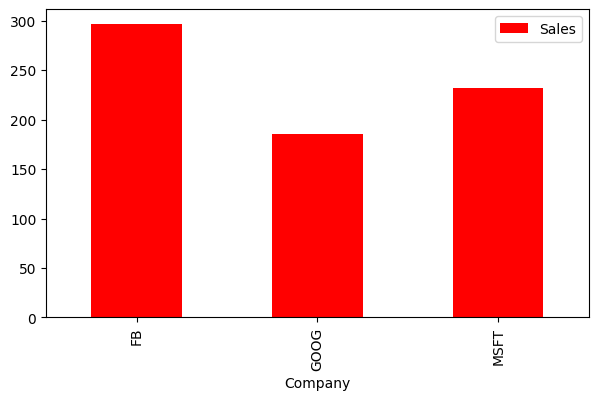

In [168]:
by_comp.mean(numeric_only=True).plot(kind = 'bar' , color = 'red', figsize=(7,4))
plt.show()

In [169]:
by_comp.std(numeric_only=True)

,Sales
Company,
FB,75.660426
GOOG,59.374518
MSFT,152.735065


In [170]:
by_comp.max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,236
MSFT,Vanessa,340


In [171]:
by_comp.min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [172]:
by_comp.count()

,Person,Sales
Company,,
FB,2,2
GOOG,3,3
MSFT,2,2


In [175]:
by_comp.agg(['count', 'max', 'min'])

Person                   Sales          
         count      max      min count  max  min
Company                                         
FB           2    Sarah     Carl     2  350  243
GOOG         3      Sam  Charlie     3  236  120
MSFT         2  Vanessa      Amy     2  340  124

In [176]:
by_comp.groups

{'FB': [5, 6], 'GOOG': [0, 1, 2], 'MSFT': [3, 4]}

In [177]:
by_comp.get_group('GOOG')

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,GOOG,John,236


In [178]:
by_comp.describe()

Sales                                                             
        count        mean         std    min     25%    50%     75%    max
Company                                                                   
FB        2.0  296.500000   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      3.0  185.333333   59.374518  120.0  160.00  200.0  218.00  236.0
MSFT      2.0  232.000000  152.735065  124.0  178.00  232.0  286.00  340.0

## Exercise 

link: [link to download data (2019)](https://insights.stackoverflow.com/survey)

In [179]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [180]:
df.shape

(88883, 85)

In [181]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [182]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [183]:
df.Country.unique()

<ArrowStringArray>
[                  'United Kingdom',           'Bosnia and Herzegovina',
                         'Thailand',                    'United States',
                          'Ukraine',                           'Canada',
                            'India',                      'New Zealand',
              'Antigua and Barbuda',                          'Germany',
 ...
                     'Burkina Faso',            'Saint Kitts and Nevis',
                           'Malawi',                          'Liberia',
                           'Bhutan', 'Saint Vincent and the Grenadines',
                       'San Marino',            'Sao Tome and Principe',
                             'Chad',                                nan]
Length: 180, dtype: str

In [184]:
len(df.Country.unique())

180

In [187]:
df.Country.value_counts()#.sort_values(ascending=False)

Country
United States                       20949
India                                9061
Germany                              5866
United Kingdom                       5737
Canada                               3395
                                    ...  
Papua New Guinea                        1
Saint Kitts and Nevis                   1
Saint Vincent and the Grenadines        1
Sao Tome and Principe                   1
Chad                                    1
Name: count, Length: 179, dtype: int64

In [189]:
df.OpSys.value_counts()

OpSys
Windows        41714
MacOS          23541
Linux-based    22472
BSD              124
Name: count, dtype: int64

In [190]:
opsys = pd.DataFrame(df.OpSys.value_counts())
opsys 

,count
OpSys,
Windows,41714
MacOS,23541
Linux-based,22472
BSD,124


In [193]:
opsys['percentage'] = (opsys['count'] / opsys['count'].sum() * 100).round(2)
opsys

,count,percentage
OpSys,,
Windows,41714,47.48
MacOS,23541,26.80
Linux-based,22472,25.58
BSD,124,0.14


In [194]:
df.Country.value_counts()

Country
United States                       20949
India                                9061
Germany                              5866
United Kingdom                       5737
Canada                               3395
                                    ...  
Papua New Guinea                        1
Saint Kitts and Nevis                   1
Saint Vincent and the Grenadines        1
Sao Tome and Principe                   1
Chad                                    1
Name: count, Length: 179, dtype: int64

In [195]:
df.Country.value_counts().loc['Canada']

np.int64(3395)

In [196]:
country_grp = df.groupby('Country')
country_grp

In [197]:
country_grp.mean(numeric_only=True)

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Country,,,,,,
Afghanistan,47441.431818,5.418654e+07,101953.333333,55.352941,14.062500,27.913043
Albania,41695.546512,1.707424e+05,21833.700000,40.121212,5.781818,25.145833
Algeria,43010.126866,7.544398e+04,34924.047619,38.220930,6.413793,27.284404
Andorra,50079.857143,7.650000e+04,160931.000000,42.000000,2.500000,28.000000
Angola,50569.400000,2.020000e+05,7764.000000,45.000000,10.000000,26.666667
...,...,...,...,...,...,...
"Venezuela, Bolivarian Republic of...",43461.170455,1.174443e+05,14581.627907,40.444444,6.717949,28.301205
Viet Nam,43895.337662,2.613438e+07,17233.436782,44.602679,8.407767,26.739884
Yemen,45331.157895,1.375000e+05,16909.166667,41.250000,12.800000,28.117647


In [198]:
country_grp.mean(numeric_only=True).columns

Index(['Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs',
       'Age'],
      dtype='str')

In [199]:
country_grp.mean(numeric_only=True).loc['Canada', ['WorkWeekHrs', 'CodeRevHrs', 'Age']]

WorkWeekHrs    40.180579
CodeRevHrs      4.743667
Age            31.426881
Name: Canada, dtype: float64

In [200]:
country_grp.get_group('Canada').head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
11,12,I am a student who is learning to code,No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed part-time,Canada,"Yes, full-time",Some college/university study without earning ...,Mathematics or statistics,...,Just as welcome now as I felt last year,Courses on technologies you're interested in,21.0,Woman,No,Straight / Heterosexual,Black or of African descent,No,Appropriate in length,Easy
20,21,I code primarily as a hobby,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",NaN,Canada,NaN,NaN,NaN,...,Not applicable - I did not use Stack Overflow ...,NaN,NaN,Man,No,NaN,NaN,No,Appropriate in length,Easy
30,31,I am a student who is learning to code,No,Never,NaN,"Not employed, and not looking for work",Canada,No,Primary/elementary school,NaN,...,NaN,NaN,NaN,Woman,No,NaN,East Asian,No,Too long,Neither easy nor difficult
36,37,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of LOWER quality than prop...",Employed part-time,Canada,"Yes, full-time",Associate degree,"A social science (ex. anthropology, psychology...",...,Just as welcome now as I felt last year,NaN,27.0,Man,No,NaN,White or of European descent,No,Appropriate in length,Neither easy nor difficult


In [201]:
df.Country == 'Canada'

0        False
1        False
2        False
3        False
4        False
         ...  
88878     True
88879    False
88880    False
88881    False
88882    False
Name: Country, Length: 88883, dtype: bool

In [204]:
df[df.Country == 'Canada'].head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
11,12,I am a student who is learning to code,No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed part-time,Canada,"Yes, full-time",Some college/university study without earning ...,Mathematics or statistics,...,Just as welcome now as I felt last year,Courses on technologies you're interested in,21.0,Woman,No,Straight / Heterosexual,Black or of African descent,No,Appropriate in length,Easy
20,21,I code primarily as a hobby,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",NaN,Canada,NaN,NaN,NaN,...,Not applicable - I did not use Stack Overflow ...,NaN,NaN,Man,No,NaN,NaN,No,Appropriate in length,Easy
30,31,I am a student who is learning to code,No,Never,NaN,"Not employed, and not looking for work",Canada,No,Primary/elementary school,NaN,...,NaN,NaN,NaN,Woman,No,NaN,East Asian,No,Too long,Neither easy nor difficult
36,37,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of LOWER quality than prop...",Employed part-time,Canada,"Yes, full-time",Associate degree,"A social science (ex. anthropology, psychology...",...,Just as welcome now as I felt last year,NaN,27.0,Man,No,NaN,White or of European descent,No,Appropriate in length,Neither easy nor difficult


In [207]:
df[df.Country == 'Canada']['SocialMedia'].unique()

<ArrowStringArray>
[                 'YouTube',                   'Reddit',
 'I don't use social media',                 'LinkedIn',
                  'Twitter',                'Instagram',
                 'WhatsApp',                 'Facebook',
               'Weibo 新浪微博',                        nan,
                 'Snapchat',                'WeChat 微信',
            'VK ВКонта́кте']
Length: 13, dtype: str

In [210]:
df[df.Country == 'Canada']['SocialMedia'].value_counts()

SocialMedia
Reddit                      901
YouTube                     526
Facebook                    515
Twitter                     405
Instagram                   246
I don't use social media    232
WhatsApp                    185
LinkedIn                    179
WeChat 微信                    44
Snapchat                     28
VK ВКонта́кте                 7
Weibo 新浪微博                    1
Name: count, dtype: int64

In [213]:
country_grp['SocialMedia'].value_counts().loc['Canada']

SocialMedia
Reddit                      901
YouTube                     526
Facebook                    515
Twitter                     405
Instagram                   246
I don't use social media    232
WhatsApp                    185
LinkedIn                    179
WeChat 微信                    44
Snapchat                     28
VK ВКонта́кте                 7
Weibo 新浪微博                    1
Name: count, dtype: int64

In [216]:
country_grp['SocialMedia'].value_counts().loc['China']

SocialMedia
WeChat 微信                   403
YouTube                      53
Weibo 新浪微博                   42
I don't use social media     27
Twitter                      27
Reddit                       12
LinkedIn                     11
Facebook                      8
Instagram                     7
Youku Tudou 优酷                7
WhatsApp                      3
VK ВКонта́кте                 1
Name: count, dtype: int64

In [217]:
df[df.Country == 'Canada']['LanguageWorkedWith'].head(20)

5                                             Java;R;SQL
11      Bash/Shell/PowerShell;HTML/CSS;Java;Python;R;SQL
20     Assembly;Bash/Shell/PowerShell;C;C++;Go;Java;J...
30                                                Python
36     Bash/Shell/PowerShell;JavaScript;Python;Other(s):
78                     C#;HTML/CSS;JavaScript;TypeScript
95                         C;C++;Java;Python;R;Scala;SQL
99               HTML/CSS;JavaScript;Ruby;SQL;TypeScript
113    Bash/Shell/PowerShell;C++;Erlang;JavaScript;PH...
200    Bash/Shell/PowerShell;C;C++;C#;HTML/CSS;Java;J...
216                          HTML/CSS;JavaScript;PHP;SQL
239     Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;SQL
271    Bash/Shell/PowerShell;C++;Clojure;Erlang;HTML/...
272                                      Java;JavaScript
279               C#;HTML/CSS;Java;JavaScript;TypeScript
282         Assembly;Bash/Shell/PowerShell;C;C++;C#;Java
301                                           JavaScript
463    Bash/Shell/PowerShell;C#

In [218]:
df[df.Country == 'Canada']['LanguageWorkedWith'].str.contains('Python').sum()

np.int64(1558)

In [219]:
for i in ['Python', 'JavaScript', 'R', 'SQL', 'PHP', 'HTML', 'C']:
    print('Number of users in {} is: '.format(i))
    print(df[df.Country == 'Canada']['LanguageWorkedWith'].str.contains(i).sum())
    print("")

Number of users in Python is: 
1558

Number of users in JavaScript is: 
2323

Number of users in R is: 
629

Number of users in SQL is: 
1863

Number of users in PHP is: 
760

Number of users in HTML is: 
2146

Number of users in C is: 
2821



In [220]:
py_count = pd.DataFrame(index=df.Country.unique(), columns=['Python_users'], dtype=float)
py_count.head()

,Python_users
United Kingdom,NaN
Bosnia and Herzegovina,NaN
Thailand,NaN
United States,NaN
Ukraine,NaN


In [221]:
for i in df.Country.unique():
    value = df[df.Country == i]['LanguageWorkedWith'].str.contains('Python').sum()
    py_count.loc[i] = value

In [222]:
py_count.head()

,Python_users
United Kingdom,2384.0
Bosnia and Herzegovina,29.0
Thailand,92.0
United States,10083.0
Ukraine,246.0


In [223]:
py_count.nlargest(1, 'Python_users')

,Python_users
United States,10083.0


In [224]:
py_count.sort_values("Python_users", ascending=False)

,Python_users
United States,10083.0
India,3105.0
Germany,2451.0
United Kingdom,2384.0
Canada,1558.0
...,...
Malawi,0.0
Saint Vincent and the Grenadines,0.0
Liberia,0.0
Chad,0.0


In [225]:
py_count = pd.DataFrame(index=df.Country.unique(), columns=['Python', 'JavaScript', 'R', 'SQL', 'PHP', 'HTML', 'C'], dtype=float)
py_count.head()

,Python,JavaScript,R,SQL,PHP,HTML,C
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
py_count.columns

Index(['Python', 'JavaScript', 'R', 'SQL', 'PHP', 'HTML', 'C'], dtype='str')

In [227]:
for i in df.Country.unique():
    for j in py_count.columns:
        value = df[df.Country == i]['LanguageWorkedWith'].str.contains(j).sum()
        py_count.loc[i, j] = value

In [228]:
py_count.nlargest(1, 'R')

,Python,JavaScript,R,SQL,PHP,HTML,C
United States,10083.0,14672.0,4644.0,11829.0,3970.0,13488.0,17348.0


In [229]:
for i in py_count.columns:
    print(i)
    print(py_count.nlargest(1, i))
    print("")
    print("")

Python
                Python  JavaScript       R      SQL     PHP     HTML        C
United States  10083.0     14672.0  4644.0  11829.0  3970.0  13488.0  17348.0


JavaScript
                Python  JavaScript       R      SQL     PHP     HTML        C
United States  10083.0     14672.0  4644.0  11829.0  3970.0  13488.0  17348.0


R
                Python  JavaScript       R      SQL     PHP     HTML        C
United States  10083.0     14672.0  4644.0  11829.0  3970.0  13488.0  17348.0


SQL
                Python  JavaScript       R      SQL     PHP     HTML        C
United States  10083.0     14672.0  4644.0  11829.0  3970.0  13488.0  17348.0


PHP
                Python  JavaScript       R      SQL     PHP     HTML        C
United States  10083.0     14672.0  4644.0  11829.0  3970.0  13488.0  17348.0


HTML
                Python  JavaScript       R      SQL     PHP     HTML        C
United States  10083.0     14672.0  4644.0  11829.0  3970.0  13488.0  17348.0


C
                P

In [230]:
for i in py_count.columns:
    print(i)
    print(py_count.nlargest(3, i))
    print("")
    print("")

Python
                Python  JavaScript       R      SQL     PHP     HTML        C
United States  10083.0     14672.0  4644.0  11829.0  3970.0  13488.0  17348.0
India           3105.0      5697.0   812.0   4429.0  2565.0   5514.0   7040.0
Germany         2451.0      3577.0   951.0   2920.0  1603.0   3446.0   4710.0


JavaScript
                 Python  JavaScript       R      SQL     PHP     HTML        C
United States   10083.0     14672.0  4644.0  11829.0  3970.0  13488.0  17348.0
India            3105.0      5697.0   812.0   4429.0  2565.0   5514.0   7040.0
United Kingdom   2384.0      3946.0   935.0   3147.0  1308.0   3722.0   4774.0


R
                 Python  JavaScript       R      SQL     PHP     HTML        C
United States   10083.0     14672.0  4644.0  11829.0  3970.0  13488.0  17348.0
Germany          2451.0      3577.0   951.0   2920.0  1603.0   3446.0   4710.0
United Kingdom   2384.0      3946.0   935.0   3147.0  1308.0   3722.0   4774.0


SQL
                 Python  J

## 4. Statemodel 

In [231]:
import statsmodels.api as sm

In [232]:
data = sm.datasets.longley.load_pandas().data
data.head()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,61187.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,63221.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


In [233]:
y = data['TOTEMP']  # Total employment
X = data[['GNPDEFL', 'GNP', 'UNEMP', 'ARMED', 'POP', 'YEAR']]

In [234]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           4.98e-10
Time:                        19:41:37   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [235]:
import wbdata

In [236]:
countries = ["USA", "CHN", "CAN"]
indicators = {"NY.GDP.PCAP.CD": "GDP per capita", "SP.DYN.LE00.IN": "Life expectancy"}
#data_date = (pd.to_datetime("2010"), pd.to_datetime("2020"))

data = wbdata.get_dataframe(indicators, country=countries)
data.head()

GDP per capita  Life expectancy
country date                                 
Canada  2023    53431.185706              NaN
        2022    55509.393176        81.295610
        2021    52496.844169        81.587073
        2020    43537.839299        81.660488
        2019    46352.869345        82.223902

In [237]:
data.loc['Canada']

,GDP per capita,Life expectancy
date,,
2023,53431.185706,NaN
2022,55509.393176,81.295610
2021,52496.844169,81.587073
2020,43537.839299,81.660488
2019,46352.869345,82.223902
...,...,...
1964,2561.638491,71.776341
1963,2380.317329,71.380732
1962,2274.428471,71.367073


In [238]:
data.unstack()#['Life expectancy']

GDP per capita                                         \
date                    1960         1961         1962         1963   
country                                                               
Canada           2264.948497  2246.083566  2274.428471  2380.317329   
China              89.520214    75.805561    70.909152    74.313372   
United States    2999.864872  3059.160821  3236.013112  3366.369790   

                                                                   \
date                  1964         1965         1966         1967   
country                                                             
Canada         2561.638491  2777.183173  3055.288079  3226.382737   
China            85.498243    98.486418   104.324185    96.589179   
United States  3565.314430  3818.288251  4136.308296  4325.959351   

                                         ... Life expectancy             \
date                  1968         1969  ...            2014       2015   
country                                  ...                              
Canada         3473.237226  3776.156131  ...       81.784390  81.815610   
China            91.472384   100.129537  ...       76.717000  76.977000   
United States  4684.588403  5019.998186  ...       78.841463  78.690244   

                                                                      \
date                2016       2017       2018       2019       2020   
country                                                                
Canada         81.924878  81.832927  81.843902  82.223902  81.660488   
China          77.218000  77.248000  77.744000  77.968000  78.077000   
United States  78.539024  78.539024  78.639024  78.787805  76.980488   

                                          
date                2021       2022 2023  
country                                   
Canada         81.587073  81.295610  NaN  
China          78.211000  78.587000  NaN  
United States  76.329268  77.434146  NaN  

[3 rows x 128 columns]

In [241]:
data.unstack()['Life expectancy']

date,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
country,,,,,,,,,,,,,,,,,,,,,
Canada,71.133171,71.346098,71.367073,71.380732,71.776341,71.872195,72.004390,72.207805,72.353415,72.501463,...,81.784390,81.815610,81.924878,81.832927,81.843902,82.223902,81.660488,81.587073,81.295610,NaN
China,33.275000,40.468000,50.818000,51.408000,52.156000,52.912000,53.637000,54.351000,55.057000,55.738000,...,76.717000,76.977000,77.218000,77.248000,77.744000,77.968000,78.077000,78.211000,78.587000,NaN
United States,69.770732,70.270732,70.119512,69.917073,70.165854,70.214634,70.212195,70.560976,69.951220,70.507317,...,78.841463,78.690244,78.539024,78.539024,78.639024,78.787805,76.980488,76.329268,77.434146,NaN


In [242]:
data.dropna(inplace=True)

data["log(GDP per capita)"] = np.log(data["GDP per capita"])

In [243]:
X = sm.add_constant(data["log(GDP per capita)"])  # Independent variable (predictor)
y = data["Life expectancy"]  # Dependent variable (response)

# Create the OLS model
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     653.1
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           6.47e-63
Time:                        19:41:43   Log-Likelihood:                -509.26
No. Observations:                 189   AIC:                             1023.
Df Residuals:                     187   BIC:                             1029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  44.0869    

In [244]:
import statsmodels.formula.api as smf

In [245]:
data2 = data
data2.columns = ['GDP_per_capita', 'Life_expectancy', 'log_GDP_per_capita']
mod = smf.ols('Life_expectancy ~ np.log(GDP_per_capita)', data2).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     653.1
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           6.47e-63
Time:                        19:41:45   Log-Likelihood:                -509.26
No. Observations:                 189   AIC:                             1023.
Df Residuals:                     187   BIC:                             1029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 44

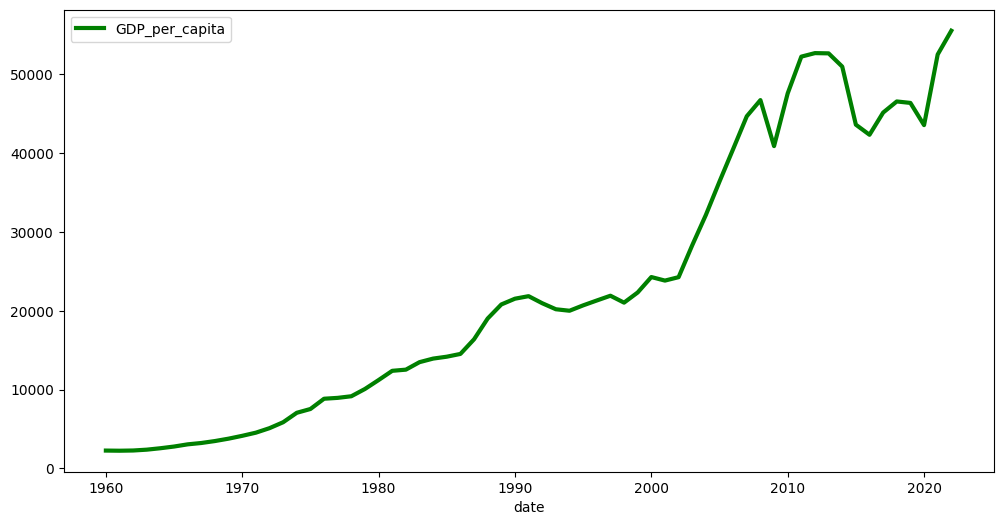

In [248]:
data.loc['Canada'].sort_index().plot(y='GDP_per_capita', color = 'g', lw = 3, figsize=(12,6));